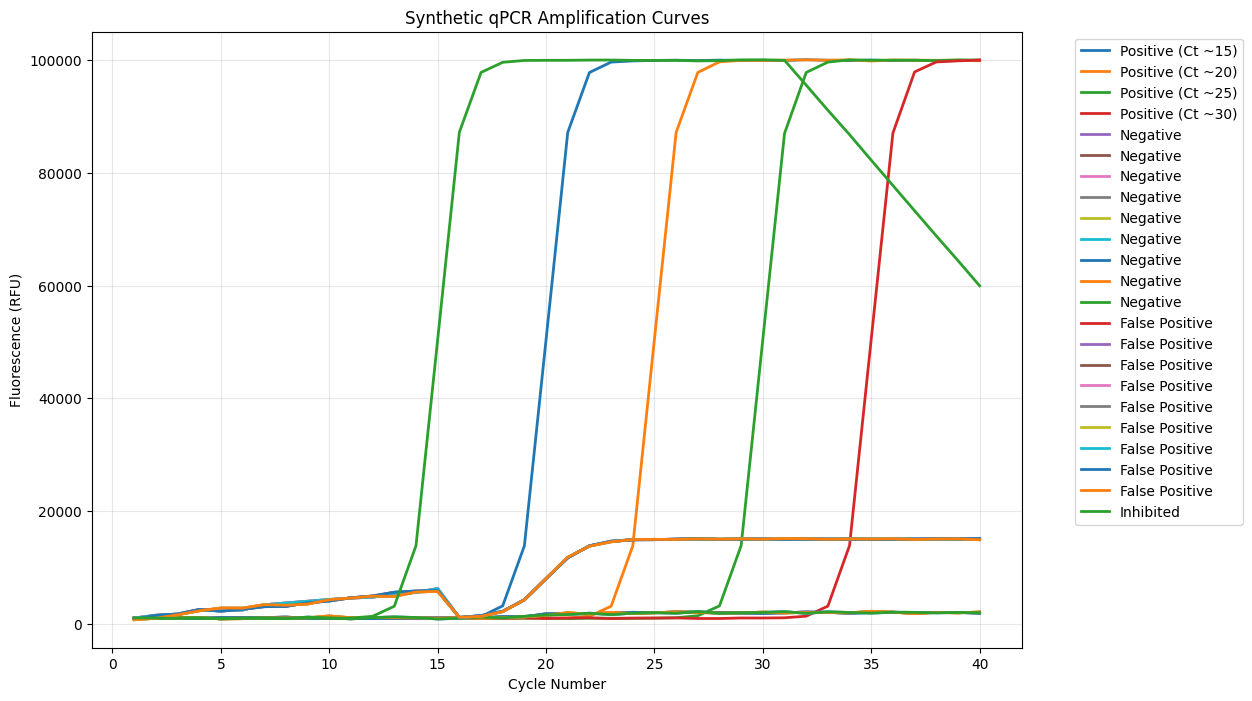

,Positive (Ct ~15),Positive (Ct ~20),Positive (Ct ~25),Positive (Ct ~30),Negative,Negative,Negative,False Positive,False Positive,False Positive,Inhibited
Cycle,,,,,,,,,,,
1,1024.835708,1036.923329,989.016406,1039.551597,902.531839,1035.778742,920.747932,1025.075062,839.177620,718.427566,1033.483628
2,993.086785,1008.568414,1017.855629,954.530627,1078.708476,1056.078468,988.526371,1509.280802,1490.332130,973.892386,1018.329914
3,1032.384427,994.217586,1073.894702,1070.139716,1115.859599,1108.305166,1050.498769,1629.942438,1734.884843,1594.392706,953.006023
4,1076.151493,984.944815,974.086489,929.907447,917.931881,1105.380318,1086.575632,2428.015316,2530.035795,2306.510025,974.306737
5,988.292331,926.073900,959.575320,1029.342855,1096.337919,862.233369,879.970665,2334.019834,2238.725757,2788.015058,947.039879
6,988.293152,964.007790,974.912148,1109.522781,1041.278924,906.218328,966.550708,2445.272881,2576.659605,2777.075167,996.869754
7,1078.960643,976.968061,1045.770106,950.473184,1082.208276,1051.505787,952.507729,3366.892413,3035.165325,3382.925876,1047.781911
8,1038.371749,1052.856111,1016.437555,971.685114,1189.685442,1051.384739,934.673221,3687.756203,3087.476987,3291.681131,950.879472
9,976.526364,1017.180914,973.511990,1004.982568,975.477890,1051.521470,1176.562125,3996.042322,3726.670602,3510.765285,1026.310666


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def generate_qpcr_curve(cycles=40, baseline=1000, plateau=100000, efficiency=1.9, ct_shift=0, noise_level=50, false_positive=False, inhibited=False):
    cycle = np.arange(1, cycles + 1)
    fluorescence = baseline + (plateau - baseline) / (1 + np.exp(-efficiency * (cycle - (20 + ct_shift))))
    fluorescence += np.random.normal(0, noise_level, cycles)
    
    if false_positive:
        fluorescence[:15] += np.linspace(0, 5000, 15) + np.random.normal(0, 200, 15)
    
    if inhibited:
        fluorescence[30:] *= np.linspace(1, 0.6, 10)
    
    fluorescence = np.maximum(fluorescence, baseline / 2)
    return cycle, fluorescence

np.random.seed(42)

curves = []
labels = []

for i in range(4):
    cycle, fluo = generate_qpcr_curve(ct_shift=i*5)
    curves.append(fluo)
    labels.append(f"Positive (Ct ~{15 + i*5})")

for i in range(3):
    cycle, fluo = generate_qpcr_curve(efficiency=1.0, plateau=2000, noise_level=100)
    curves.append(fluo)
    labels.append("Negative")

for i in range(3):
    cycle, fluo = generate_qpcr_curve(false_positive=True, efficiency=1.2, plateau=15000)
    curves.append(fluo)
    labels.append("False Positive")

cycle, fluo = generate_qpcr_curve(ct_shift=-5, inhibited=True)
curves.append(fluo)
labels.append("Inhibited")

df = pd.DataFrame(np.array(curves).T, columns=labels)
df.index = cycle
df.index.name = "Cycle"

plt.figure(figsize=(12, 8))
for col in df.columns:
    plt.plot(df.index, df[col], label=col, linewidth=2)

plt.xlabel("Cycle Number")
plt.ylabel("Fluorescence (RFU)")
plt.title("Synthetic qPCR Amplification Curves")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()

df.head(10)